### McDonalds Market Segmentation Analysis
#### Pamal

In [54]:
import os
import warnings
warnings.filterwarnings("ignore")

In [55]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [56]:
data = pd.read_csv("mcdonalds.csv") #loading data

In [57]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [59]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [60]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [61]:
data['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [62]:
data['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [63]:
data['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

In [64]:
df1 = data.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 

In [65]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
df_encoded = df1.apply(LabelEncoder().fit_transform) #transforming categorical values into numarical values

In [68]:
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [69]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [70]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [71]:
# pca 
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
# create dataframe with pca values 
pf.head()

explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_
components = pca.components_

print("Standard deviation:\n", singular_values)
print("Proportion of Variance:\n", explained_variance_ratio)
print("Cumulative Proportion:\n", explained_variance_ratio.cumsum())

Standard deviation:
 [63.91179298 48.69332668 44.78138456 39.63136078 36.52831435 33.7082743
 32.22832023 29.33600188 27.59057302 21.14107869 19.31862906]
Proportion of Variance:
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Cumulative Proportion:
 [0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


In [72]:
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

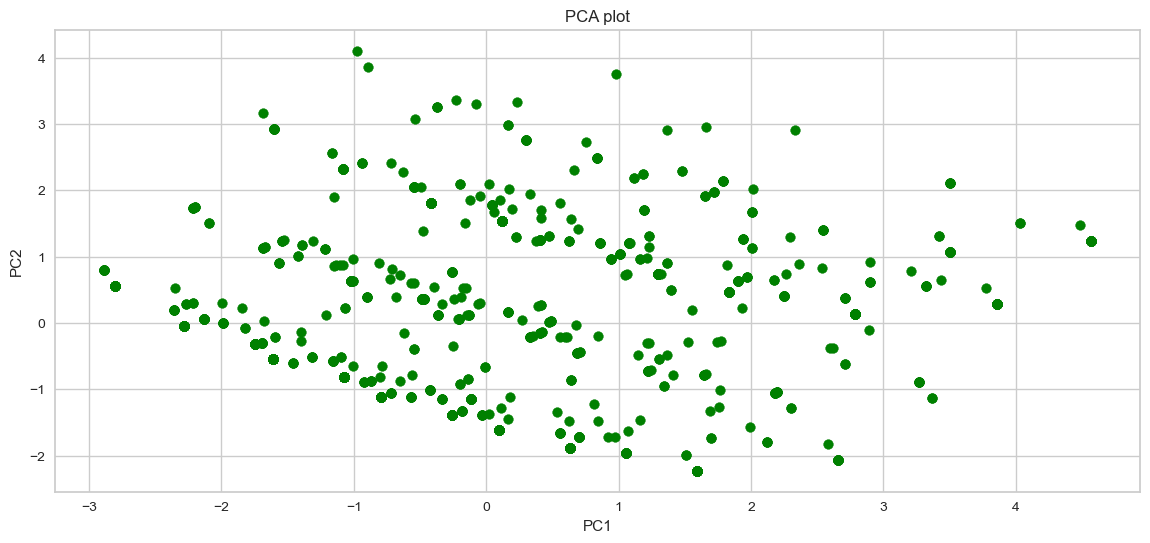

In [74]:
plt.figure(figsize=(14,6))
plt.scatter(pc[:, 0], pc[:, 1], c='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

In [75]:
# pca componant for each feature
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


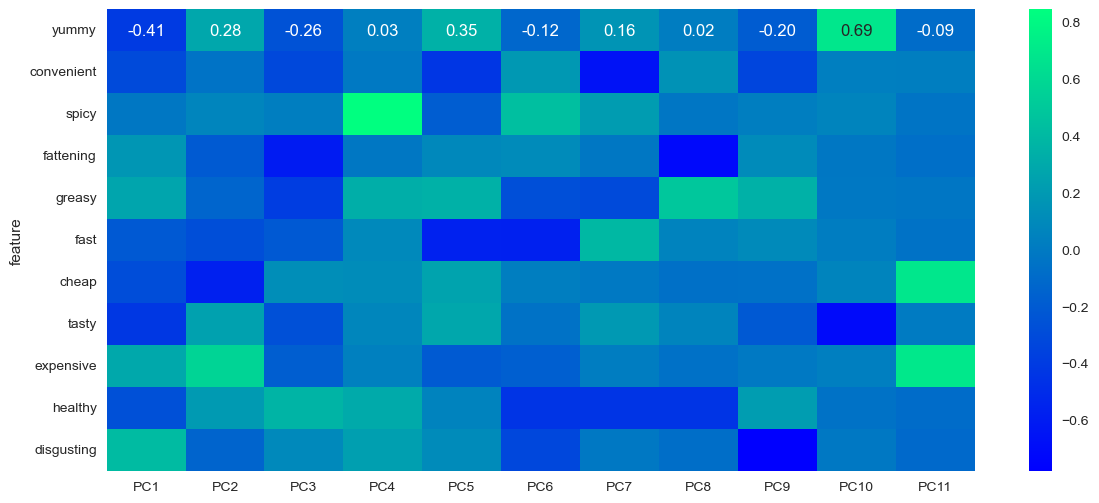

In [76]:
plt.rcParams['figure.figsize'] = (14,6)
ax = sns.heatmap(loadings_df, annot=True, cmap='winter', fmt='.2f', cbar=True)
plt.show()

In [77]:
from bioinfokit.visuz import cluster

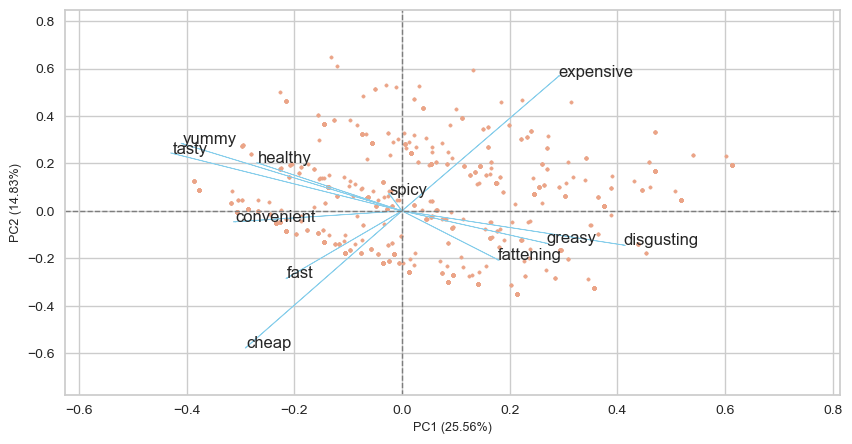

In [78]:
#2d biplot with pca score 
pca_scores = PCA().fit_transform(pca_data)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [79]:
#kmeans-clustering 
from sklearn.cluster import AgglomerativeClustering, KMeans
from collections import Counter

In [80]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
data['cluster_num'] = kmeans.labels_

print ('Labels:', kmeans.labels_)

print ('WCSS:', kmeans.inertia_)

print('No. of iterations: ', kmeans.n_iter_)

print('Cluster centroids: ', kmeans.cluster_centers_)

print('Cluster size: ', Counter(kmeans.labels_))

Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0425348972685
No. of iterations:  8
Cluster centroids:  [[0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.02040816 0.68571429 0.08571429 0.91836735 0.69795918 0.73469388
  0.06530612 0.08571429 0.87755102 0.06122449 0.71836735]]
Cluster size:  Counter({1: 580, 0: 324, 2: 304, 3: 245})


In [81]:
# Convert "Yes" to 1 and everything else to 0 and find column means to 2 decimal point 

MD_x = data.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
column_means = MD_x.mean()
rounded_column_means = column_means.round(2)
print(rounded_column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [82]:
# Kmeans clustering using elbow method 

np.random.seed(1234)
inertia_values = []
cluster_labels = {}
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=1234)
    km.fit(MD_x)
    inertia_values.append(km.inertia_)
    cluster_labels[k] = km.labels_
optimal_k = 3
optimal_cluster_labels = cluster_labels[optimal_k]
print(optimal_cluster_labels)

[1 0 0 ... 0 2 1]


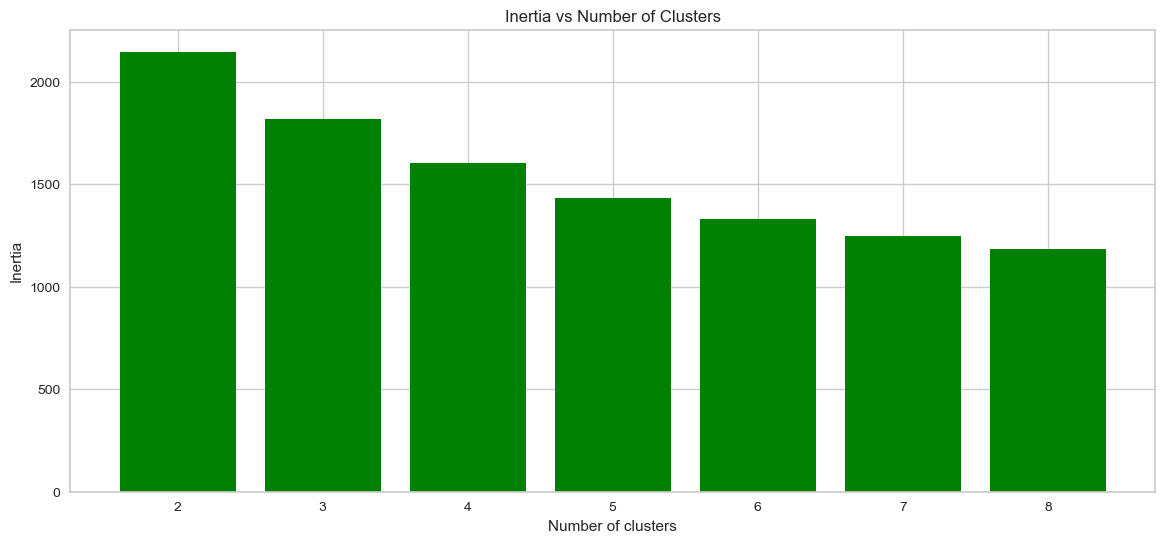

In [83]:
#plot the inertia value

plt.bar(range(2, 9), inertia_values, color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

                  Age  cluster_num
Age          1.000000     0.222208
cluster_num  0.222208     1.000000


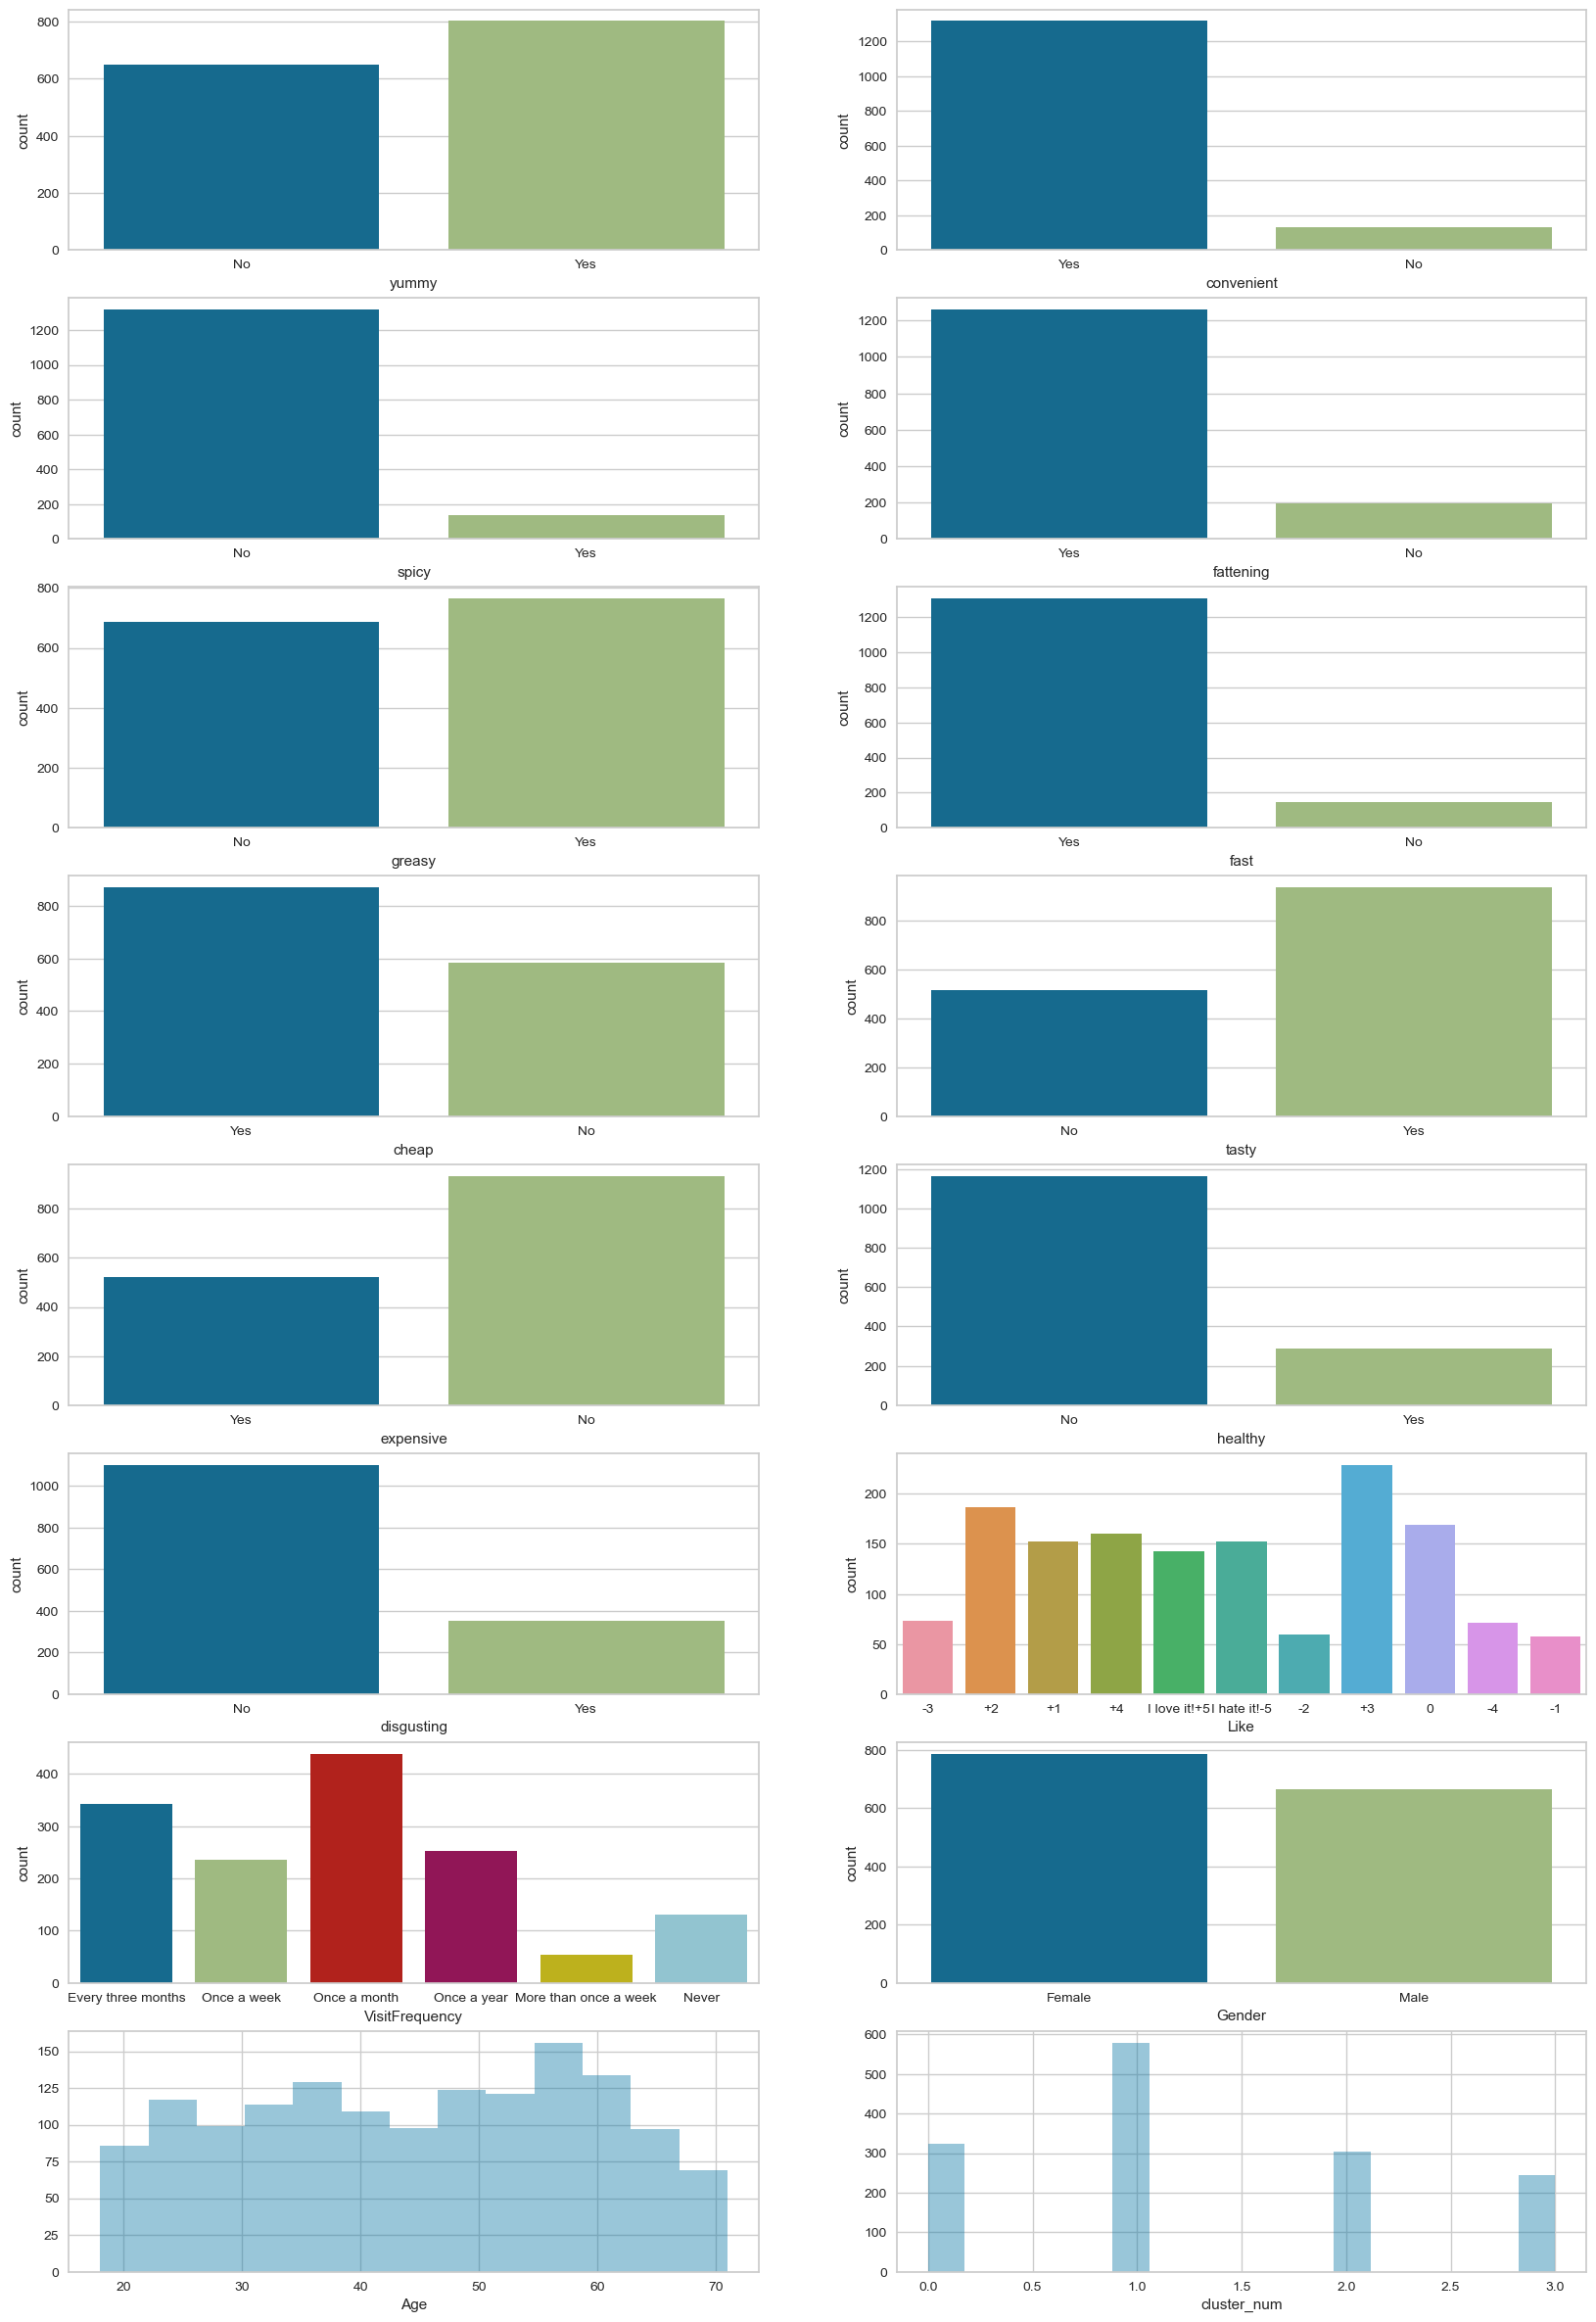

In [84]:
#create a function for plotting the features

def EDA(data, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((data.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in data.columns:
        if data[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=data, x=i)
        else:
            con.append(i)

    for i in con:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(data[i].dropna(), kde=False)  # Exclude missing values

    print(data[con].corr())

EDA(data, (20, 30))

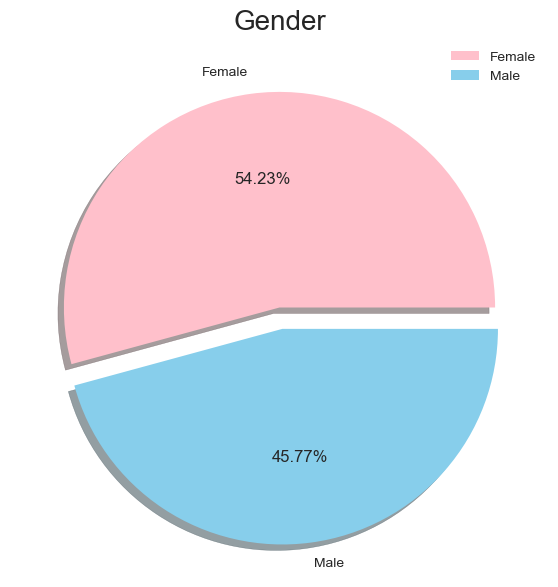

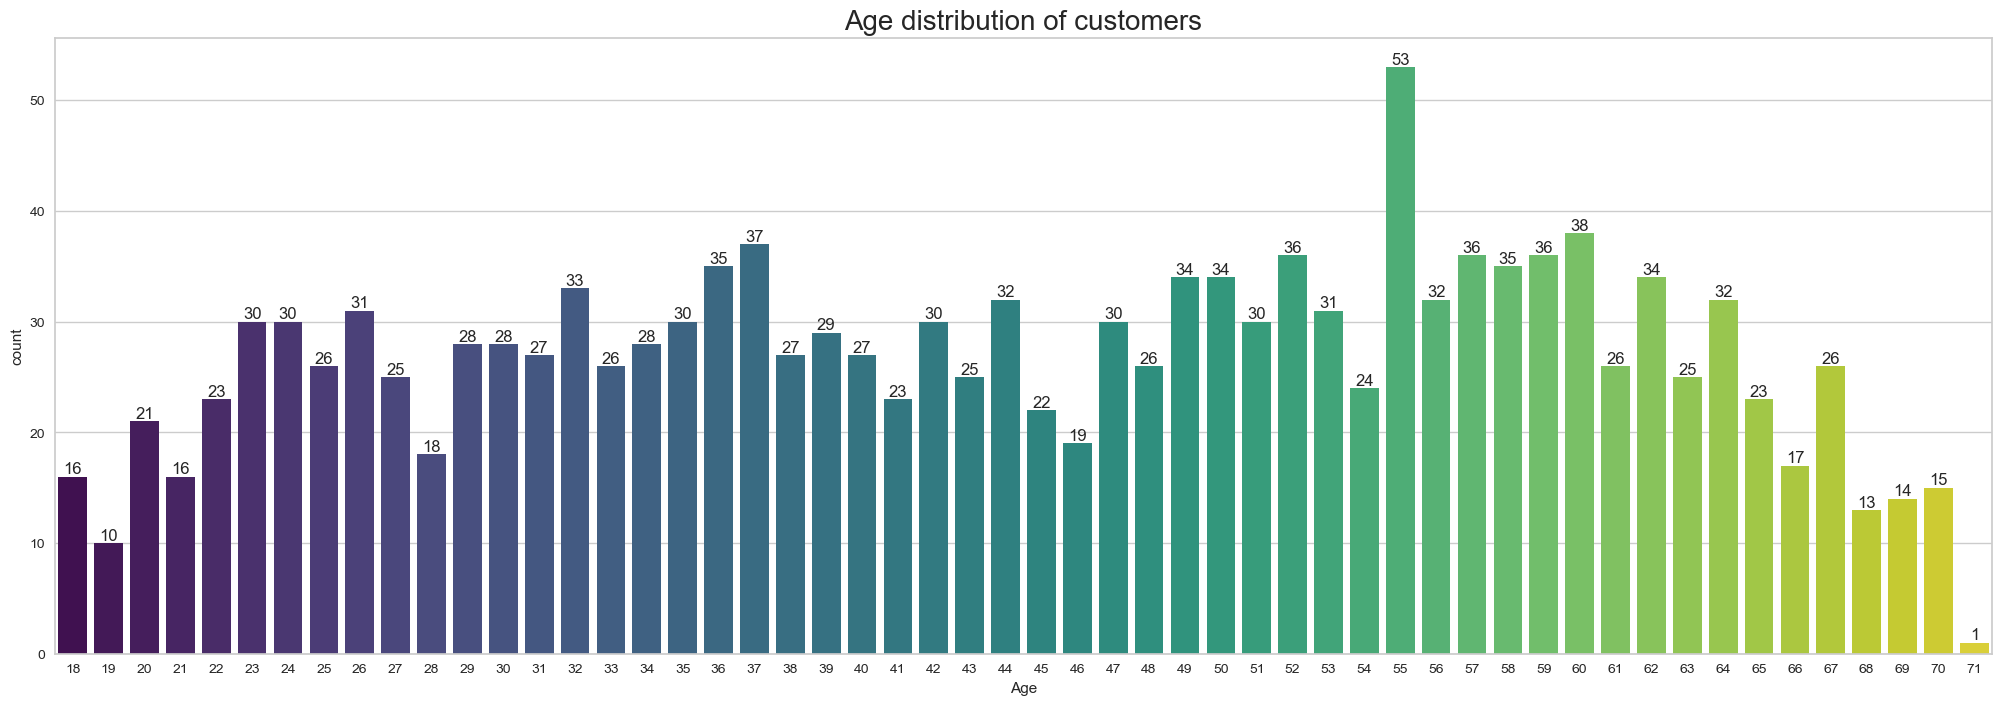

In [85]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['pink', 'skyblue']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


plt.rcParams['figure.figsize'] = (25, 8)
datag = sns.countplot(x=data['Age'], palette = 'viridis')
datag.bar_label(datag.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

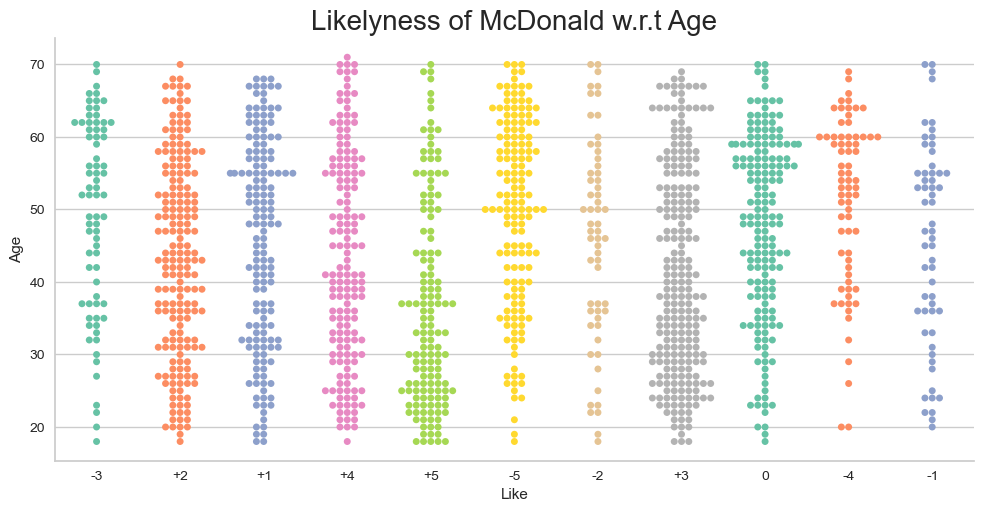

In [86]:
data['Like'] = data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=data, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

In [87]:
from yellowbrick.cluster import KElbowVisualizer

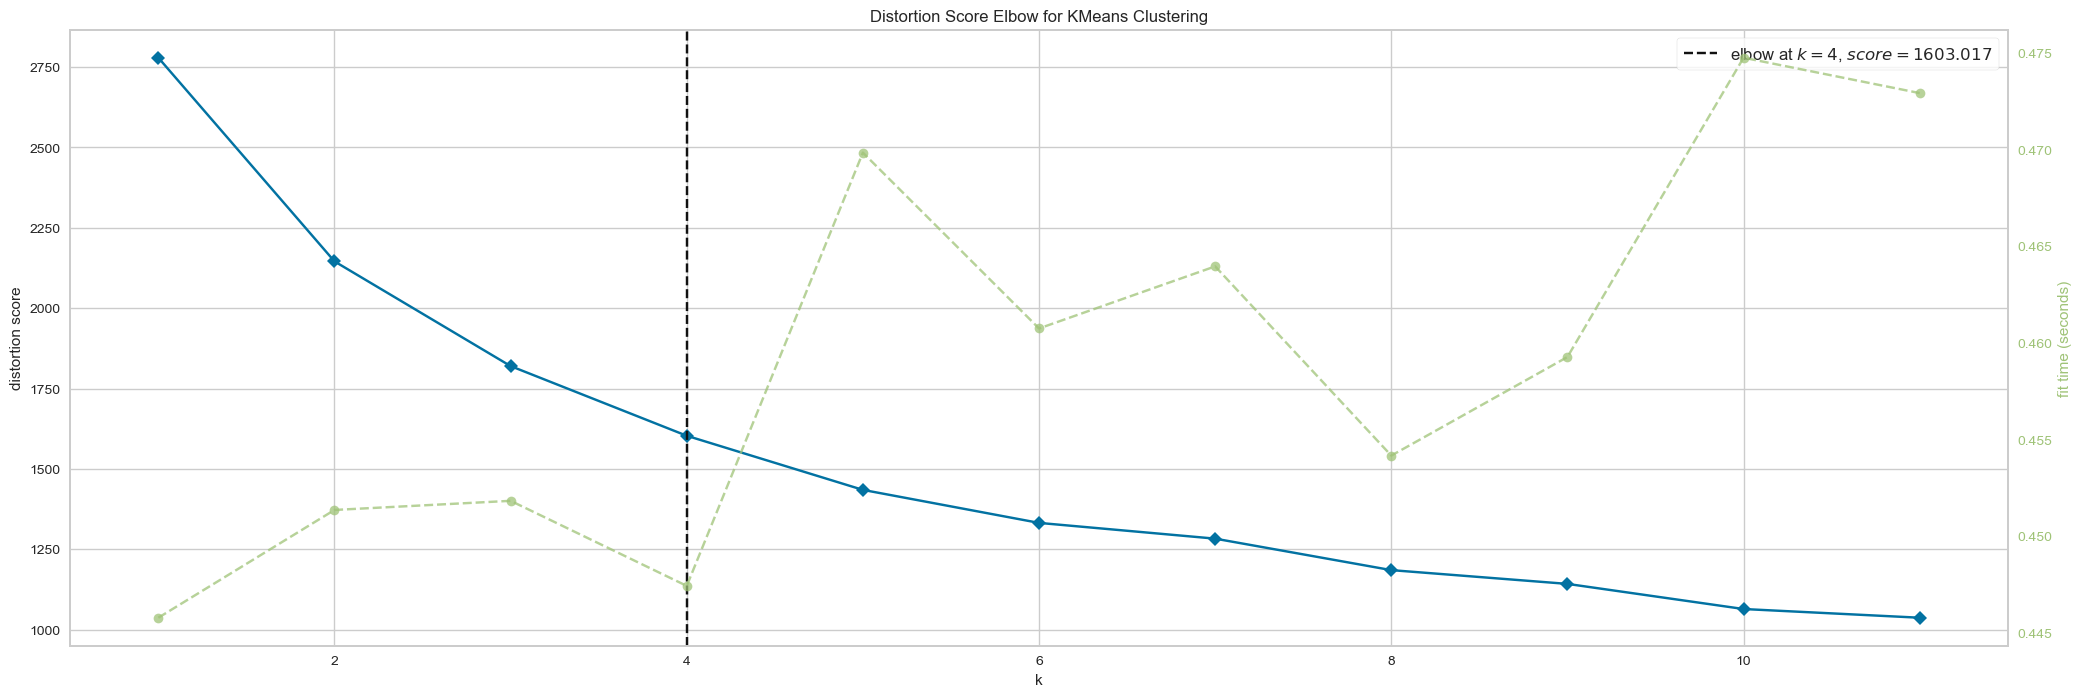

<Figure size 1400x700 with 0 Axes>

In [88]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
plt.figure(figsize=(14, 7))
visualizer.show();

In [89]:
from statsmodels.graphics.mosaicplot import mosaic

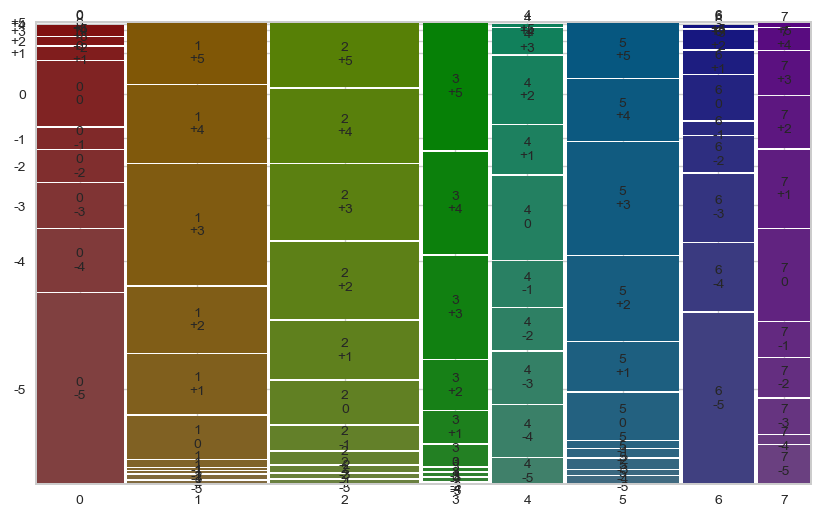

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,73,24,17,12,8,25,5,3,4,0,0
1,2,3,1,1,4,26,36,40,73,47,37
2,3,3,4,8,16,28,38,50,49,48,42
3,0,0,1,1,1,6,9,14,29,29,36
4,8,16,16,13,14,26,15,21,8,1,0
5,4,2,5,4,3,23,24,41,55,30,27
6,53,21,21,11,4,14,7,6,1,0,0
7,9,2,8,9,8,21,18,12,10,5,1


None

In [90]:
data['cluster_num'] = km.labels_
crosstab = pd.crosstab(data['cluster_num'], data['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

plt.rcParams['figure.figsize'] = (10,6)
mosaic(crosstab.stack())
display(crosstab, plt.show())

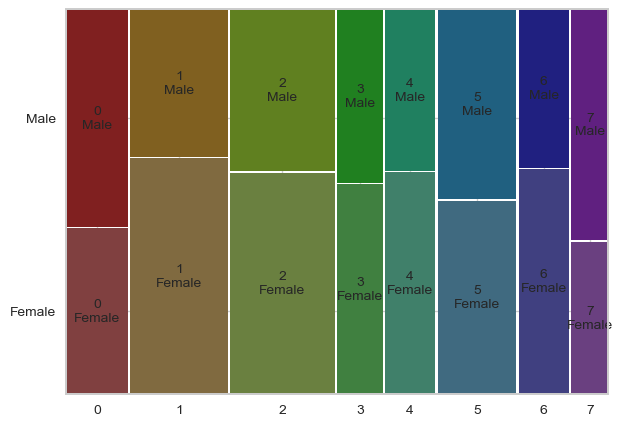

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,73,24,17,12,8,25,5,3,4,0,0
1,2,3,1,1,4,26,36,40,73,47,37
2,3,3,4,8,16,28,38,50,49,48,42
3,0,0,1,1,1,6,9,14,29,29,36
4,8,16,16,13,14,26,15,21,8,1,0
5,4,2,5,4,3,23,24,41,55,30,27
6,53,21,21,11,4,14,7,6,1,0,0
7,9,2,8,9,8,21,18,12,10,5,1


None

In [91]:
crosstab_gender = pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

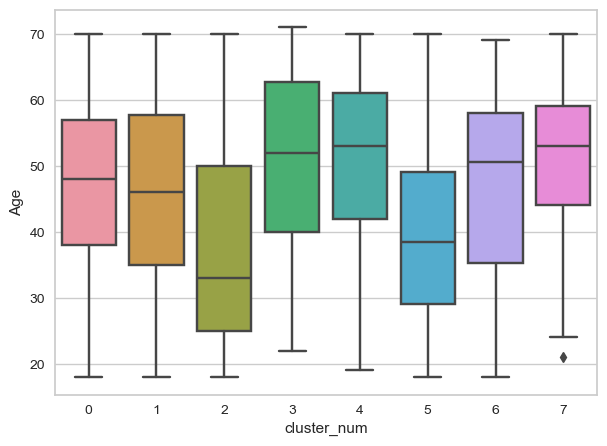

In [92]:
sns.boxplot(x="cluster_num", y="Age", data=data);

In [93]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.666667
1,1,2.566667
2,2,2.633218
3,3,2.523810
4,4,2.862319
5,5,2.623853
6,6,2.840580
7,7,2.388350


In [94]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.666667
1,1,2.566667
2,2,2.633218
3,3,2.523810
4,4,2.862319
5,5,2.623853
6,6,2.840580
7,7,2.388350


In [95]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,7.842105
1,1,3.000000
2,2,3.276817
3,3,3.023810
4,4,5.507246
5,5,3.233945
6,6,7.434783
7,7,4.932039


In [96]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.567251
1,1,0.385185
2,2,0.422145
3,3,0.452381
4,4,0.420290
5,5,0.495413
6,6,0.413043
7,7,0.601942


In [97]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.567251,7.842105,2.666667
1,1,0.385185,3.000000,2.566667
2,2,0.422145,3.276817,2.633218
3,3,0.452381,3.023810,2.523810
4,4,0.420290,5.507246,2.862319
5,5,0.495413,3.233945,2.623853
6,6,0.413043,7.434783,2.840580
7,7,0.601942,4.932039,2.388350


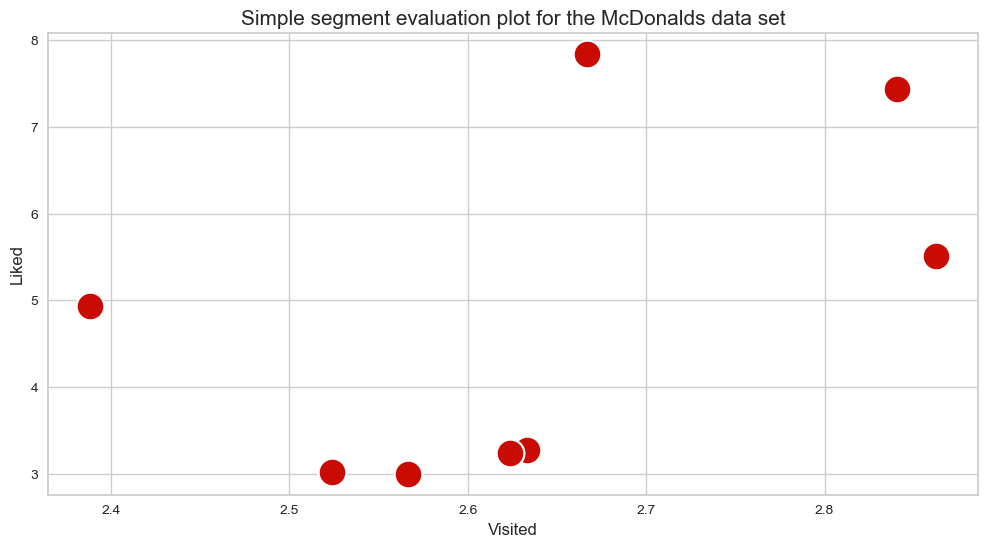

In [100]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = "VisitFrequency", y = "Like", data=segment, s=400, color="r")
plt.title("Simple segment evaluation plot for the McDonalds data set", fontsize = 15)
plt.xlabel("Visited", fontsize = 12)
plt.ylabel("Liked", fontsize = 12)
plt.show()